# Convolutional Neural Network

## 이미지 자체가 입력으로 들어가서 conv 하고 마지막 부분에 FC layers해서 y^ 계산

- 수학적 연산을 사용해서 이미지의 특성을 추출하는 레이어를 포함
- 이미지, 영상 데이터 처리가 유용
- DNN은 파라미터가 엄청 나게 늘어남
  - 1차원 입력은 위치 상관관계가 적어져서 입력 데이터 변형에 매우 취약해짐
- CNN은 conv layer 와 pooling layer가 존재함
  - conv relu pooling 순서로 쌓음
  - 마지막 층은 soft max

### Convolution

    -> input : h,w 2차원이미지
    -> kernel : 특징 추출을 위해 상용되는 필터
    -> feature map : 커널을 거쳐 연산된 결과로 추출된 특징을 나타낸다

#### 학습데이터에 너무 핏되어서 복잡도가 증가될경우 과적합 문제 발생한다.

##### 과적합 문제해결

- 규제 L1, L2
- 드롭 아웃 기법
- Batch Normalization
  - 미니배치와 내부 공변량 변화를 이용
  - 미니배치 : 일정 크기로 나누어 놓은거
  - 공변량 변화 : 이전 층들의 학습에 의해 가중치 값이 변하게 되면 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생하는 문제

##### 모든 학습은 오차역전파 알고리즘 -> **경사하강법**

GD, Momentum, AdaGrad, RMSprop, Adam

##### Momentum

- 경사하강법에 관성을 더해주는 알고리즘, 합벡터를 구해서 사용

##### NAG

- 모멘텀을 이용해 미리 이동 시키고 그 위치에서 그레디언트 계산함

##### AdaGrad

- 각 가중치에 대해 별도의 학습률을 사용하는 알고리즘

##### RMSprop

- 지수 이동 평균 기법을 적용 최근 값의 영향은 더욱 크고, 오래된 값의 영향은 대폭 낮추는 알고리즘

##### Adam

- 가장 좋은 학습 성능을 보이며 현재 딥러닝 모델에 가장 많이 쓰이는 대중적인 알고리즘
- RMSprop 방식과 직전 단계 가중치 변화량에 힘을 실어주는 Momentum 방식이 결합된 Adam 알고리즘

## 데이터 어그맨테이션 해보기

#### 윤곽 찾기는 : 라플라시안 필터

인풋 7x7 , 커널 3x3 ,아웃풋 5x5로 출력되어서 제로페딩을 통해 7x7을 유지해야함

- 데이터 손실을 줄여주기위해 원래 데이터에 없던 데이터를 붙였기 때문에 noise가 발생
- 필터 사이즈 : 출력 크기 조절 3x3, 2x2 정도로
- Stride 필터가 이미지에 적용될때 한번에 움직이는 픽셀
- Padding 입력 데이터 주변에 0또는 1로 채우는것
- Kernel, 층의 전체 뉴런에 적용된 하나의 필터는 하나의 특성 맵. 특성맵은 필터를 가장 크게 활성화 시키는 이미지의 영역을 강조


#### 출력 데이터 크기 계산해보기

$$
\text{output size} = \frac{(\text{FeatureMap} - \text{KernelSize} + 2 \times \text{Padding})}{\text{strides}}
$$


가중치 = (필터 크기) _ (필터 수) _ (입력 데이터의 채널 수)  
편향치 = (채널 수)  
파라미터 수 = (가중치) + (편향치)


##### 폴링 계층

- 세로 및 가로 방향의 공간을 줄이는 연산
- Max Pooling, Average Pooling, Stochastic Pooling


##### 폴링을 사용하는 이유

- 데이터 차원 감소
  - 계산 효율성 향상, 메모리 요구량 감소
  - 여러개의 크기가 다른 이미지를 입력 받는 경우 유용
  - 오버피팅 방지

##### 폴링 특징

- 풀링 계층은 합성곱 계층과 달리 학습해야 할 매개변수가 없음
- 풀링은 대상 영역에서 최대값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없음
- 풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 전달
- 풀링은 2차원 데이터의 크기를 줄이는 연산이므로 3차원을 결정하는 채널 수는 건드리지 않음(채널마다 독
  립적 계산)
- 입력의 변화에 영향을 적게 받음.
- 입력 데이터가 조금 변하더라도 풀링 계층 자체가 그 변화를 흡수하여 사라지게 함


### CNN의 전체 구조와 흐름

- Sequential
- Conv1D
- MaxPooling1D
- Flatten
- Dense
- model.compile()
  - losses
  - optimizers
- model.fit()


#### CNN 학습 성능 향상 방법

- Activation function 뒤에 dropout 적용
- Batch normalization
  - conv layer 뒤에 적용하여 정규화 하는것
  - activation이 적용되어 분포가 달라지기 전에 적용하는 것이 효과적
- conv layer -> batch Normalization -> activation function -> pooling layer

### 일반화(Generalization)

- Training error와 Test error의 차이를 Generalization performance라
- 일반화 성능이 좋다 -> train error와 test error의 gap이 적다


## CNN 연습하기


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape,  test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
train_image = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [6]:
#데이터 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0

### output 사이즈 계산 손으로 해보기


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
# 32개의 필터를 사용하고, 각 필터는 3x3 크기
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/Users/coldbrew/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7360 - loss: 0.7126
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8804 - loss: 0.3342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8962 - loss: 0.2814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9122 - loss: 0.2431
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9214 - loss: 0.2142


In [11]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9069 - loss: 0.2705


[0.2645387053489685, 0.9065999984741211]

In [55]:
# 모델 바꿔보기
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))  
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))  
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))  
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))  
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Dropout(0.2))

# model.add(layers.Conv2D(32, (2,2), activation='relu'))
# model.add(layers.Flatten())
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=32,
    validation_split=0.2,   # ← 훈련 세트의 20%를 검증용으로
    verbose=1
)

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_136 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_138 (Conv2D)             │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_139 (Conv2D)             │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,082 (371.41 KB)

 Trainable params: 95,082 (371.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6757 - loss: 0.8715 - val_accuracy: 0.8473 - val_loss: 0.4071
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8541 - loss: 0.3995 - val_accuracy: 0.8752 - val_loss: 0.3418
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8751 - loss: 0.3352 - val_accuracy: 0.8865 - val_loss: 0.3069
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8873 - loss: 0.3086 - val_accuracy: 0.8857 - val_loss: 0.3093
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8966 - loss: 0.2775 - val_accuracy: 0.9037 - val_loss: 0.2671


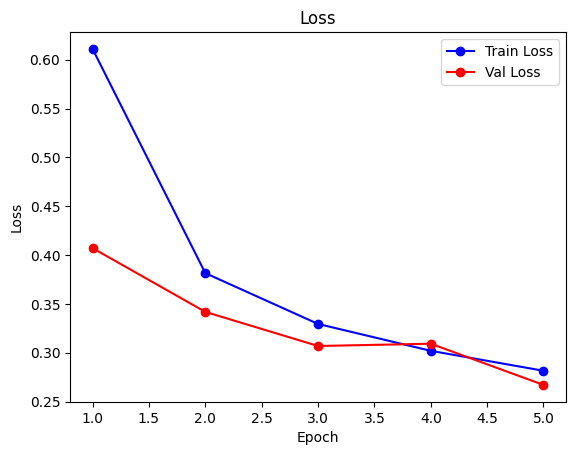

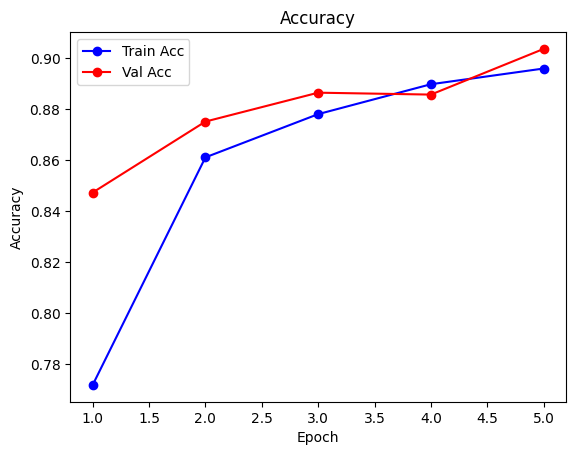

In [56]:
# 학습 후, history 객체에서 훈련 손실/정확도 & 검증 손실/정확도 확인
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# 예시) 간단한 플롯
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-o', label='Train Loss')
plt.plot(epochs, val_loss, 'r-o', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b-o', label='Train Acc')
plt.plot(epochs, val_acc, 'r-o', label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 머신러닝 프레임워크와 딥러닝 프레임 워크

## 머신러닝 프레임워크

- 분류, 회귀, 클러스터링, 비정상행위탐지, 데이터 준비
- scikit learn MLlib
- 스피크 MLlib

## 딥러닝 /DNN 프레임워크

- 케라스

# 딥러닝 순서

1. 데이터 준비 , 데이터 표시
2. 데이터 전처리
3. 모델 구성
4. 모델 컴파일
5. 모델 훈련
6. 정확도 평가
7. 시각화

## 케라스 layers

- batch normalization \*\*\*\*
  - valid score가 팍팍 튀는걸 줄일 수 있음
- Dropout
  - 과적합 줄임
- GlobalAveragePooling 1d, 2d
  - 글로벌로 피처를 뽑음
- GlobalMaxPooling 1d, 2d

## keras.callbacks()

- CSVLogger
- EarlyStopping
- ModelCheckpoint
- Tensorboard

## 데이터 제너레이터

- .fit_genrator()
- .predict_generator()
- .utils.Sequence()

## 손실함수

- 머신러닝과 유사

## ModelCheckpoint

- filepath : 문자열. 모델 가중치를 저장할 파일 경로. 파일 이름에는 epoch와 val_loss (또는 다른 지표)와 같은 템플릿 인수를 사용.
- monitor : 모니터링할 지표를 지정. 기본값은 val_loss.
- verbose : 얼마나 자세하게 정보를 표시할지를 제어. 0, 1 또는 2로 설정할 수 있으며, 기본값은 0.
- save_best_only : 가장 좋은 성능을 보인 가중치만 저장하려면 True로 설정. 기본값은 False.
- save_weights_only : 가중치만 저장하려면 True로 설정. 기본값은 False. False로 설정하면 모델 구조와 - 가중치를 모두 저장.
- mode : 모니터링할 지표의 최소화 또는 최대화를 제어. 'auto', 'min' 또는 'max' 중 하나로 설정할 수 있으며, 기본값은 'auto'.
- save_freq : 가중치를 저장할 빈도를 지정.
  - 'epoch' 또는 정수를 입력.
  - 'epoch'로 설정하면 각 에포크가 끝날 때마다 가중치를 저장.
  - 정수로 설정하면 해당 빈도로 가중치를 저장.
  - 기본값은 'epoch'.


In [60]:
# from keras.callbacks import ModelCheckpoint
# #ModelCheckpoint객체를생성.
# X_train = np.random.random((1000, 64))
# y_train = np.random.randint(10, size=(1000, 1))

# checkpoint=ModelCheckpoint("weights.h5",
#     monitor='val_accuracy',
#     verbose=1,
#     save_best_only=True,
#     mode='max',
#     save_weights_only=True)
# #모델을학습합니다.ModelCheckpoint객체를콜백으로전달.
# model.fit(x_train,y_train,
#     epochs=10,
#     batch_size=128,
#     callbacks=[checkpoint])


## EarlyStopping

- Keras 콜백 함수 중 하나, 검증 손실이 더 이상 개선되지 않을 때 학습을 중단시키는 역할. 이를 통해 과적합을 방지하고 학습 시간을 단축


## 데이터 증강 \*\*

케라스에서는 이미지 데이터 보강을 위한 ImageDataGenerator 제공
주요 인수
train_datagen = ImageDataGenerator(  
 rescale = 1./ 255, #데이터에 제공된 값을 곱함  
 rotation_range = 20, # 무작위 회전에 대한 도(ᄋ) 단위 범위  
 width_shift_range = 0.1, #이미지를 수평으로 임의로 이동(전체 너비의 대칭)  
 height_shift_range = 0.1, #이미지를 수직으로 임의로 이동(전체 높이의 대칭)  
 zoom_range = 0.05, # 무작위 확대/축소 범위  
 horizontal_flip = True, #입력을 수평으로 랜덤하게 뒤집음  
 fill_mode = ‘reflect’) #One of {“constant”, “nearest”, “reflect” or “wrap”}, “nearest”가 기본  
val_datagen = ImageDataGenerator(rescale=1./ 255)  
test_datagen = ImageDataGenerator(rescale=1./ 255)


## 이미지 데이터 증강 방법

- 랜덤하게 이미지를 자르기
- 회전
- 밝기 조절
- 블러 처리
- 노이즈 삽입


# CIFAR - 100


1. 데이터 준비
2. 데이터 표시
3. 정규화 처리
4. 데이터분리
5. 레이블 데이터 shape 변경
6. 원핫 인코딩
7. 넘파일 배열로 변환
8. 모델 만들기
9. 모델 학습
10. 예측
11. 혼동행렬 시각화


In [1]:
# 1. 데이터 준비
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


/var/folders/w5/_14ckm9x10lb_j7dz73z0rjc0000gn/T/ipykernel_29740/602442581.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[idx])])


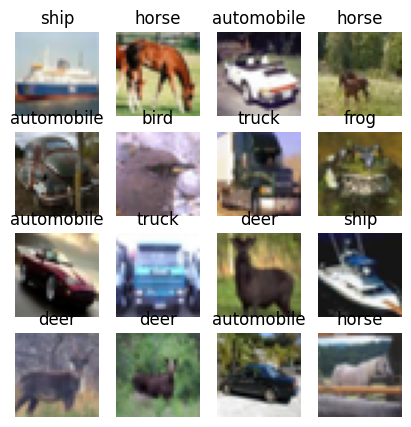

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples = np.random.randint(X_train.shape[0], size=16)
plt.figure(figsize=(5, 5))

for i, idx in enumerate(samples):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_names[int(y_train[idx])])
plt.show()


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=777)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
from tensorflow.keras.utils import to_categorical

# label을 one-hot encoding

y_train_oh = to_categorical(y_train, 10)
y_val_oh = to_categorical(y_val, 10)
y_test_oh = to_categorical(y_test, 10)

print(y_train_oh.shape, y_val_oh.shape, y_test_oh.shape)

(35000, 10) (15000, 10) (10000, 10)


In [5]:
y_train_oh[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
y_train_oh = np.array(y_train_oh)
y_val_oh = np.array(y_val_oh)
y_test_oh = np.array(y_test_oh)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def build_model():
    model = Sequential()
    model.add(layers.Conv2D(32, 3, padding='same',
                            activation='relu', 
                            input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, 3, padding='same',
                            activation='relu', 
                            input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, 3, padding='same',
                            activation='relu', 
                            input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, 3, padding='same',
                            activation='relu', 
                            input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


In [23]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model = build_model()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/coldbrew/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,188,106 (4.53 MB)

 Trainable params: 1,188,106 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
y_train_oh.shape

(35000, 10)

In [27]:
EPOCHS = 20
BATCH_SIZE = 256

history = model.fit(X_train, y_train_oh, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val_oh))


Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6931 - loss: 0.8682 - val_accuracy: 0.7119 - val_loss: 0.8202
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7032 - loss: 0.8482 - val_accuracy: 0.6879 - val_loss: 0.8944
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6966 - loss: 0.8686 - val_accuracy: 0.7169 - val_loss: 0.8255
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6947 - loss: 0.8969 - val_accuracy: 0.7260 - val_loss: 0.7919
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6900 - loss: 0.9228 - val_accuracy: 0.7144 - val_loss: 0.8313
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6763 - loss: 0.9926 - val_accuracy: 0.5998 - val_loss: 1.2492
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6208 - loss: 1.2768 - val_accuracy: 0.6885 - val_loss: 0.9862
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6359 - loss: 1.3158 - val_accu

In [28]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


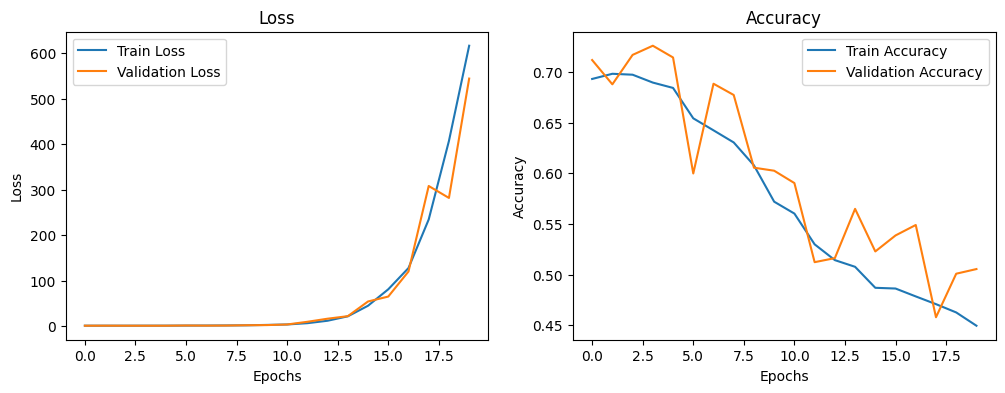

In [29]:
import matplotlib.pyplot as plt

# 학습 및 검증 손실 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 학습 및 검증 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


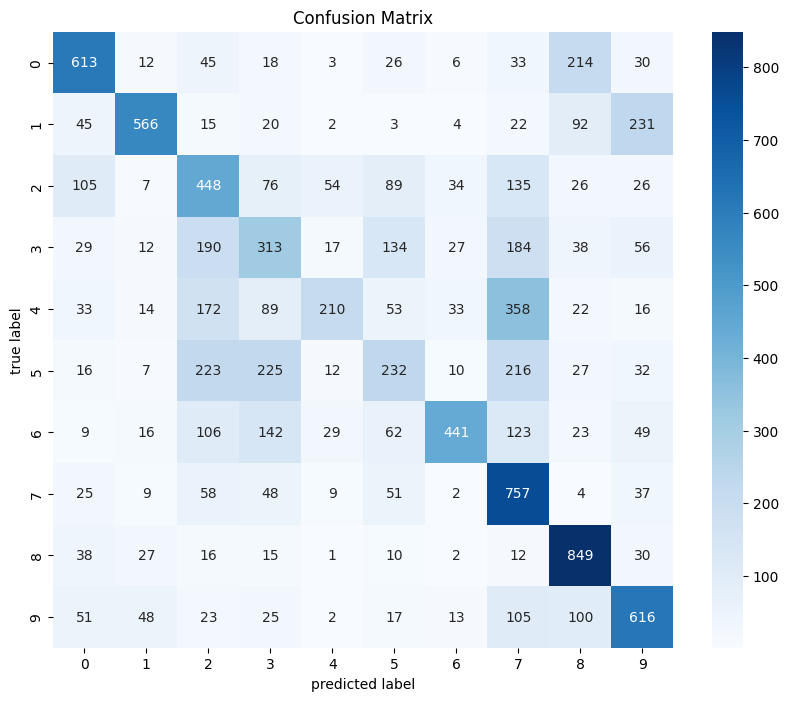

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_maxtrix(y_test, y_pred):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title('Confusion Matrix')
    plt.show()

plot_maxtrix(y_test, y_pred_argmax)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(
    X_train, y_train_oh,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val_oh),
    callbacks=[early_stopping, model_checkpoint]
)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5